# [Public Policy 275] Spatial Data and Analysis, Fall 2020

# Lab 3: Point Processes

* University of California, Berkeley
* Instructor: Solomon Hsiang
* GSI: Simon Greenhill and Hikari Murayama

**About This Lab**
* Due Date: September 14th, 2022
* You may talk with other students about the lab, but each student is responsible for doing all exercises in the lab themselves and turning in their own write up. We will be checking code for evidence of copying and pasting.
* When you are done with the lab, please restart the kernel and run all the codes one more time (press the ">>" button), so that the grader will see a clean notebook. Don't forget to save! Please submit this lab to bCourses as `YOURCAL1ID.ipynb`. This will facilitate anonymous grading.
* In addition your `ipynb` file, please also submit a PDF version of it. You can do this by saving and exporting as a PDF. If that's not working, save and export as a HTML, save and export it as an HTML and then print it to a PDF file.
* This lab requires that you download the following files and place them in the same directory as this jupyter notebook:
    * `Lab3_crime.csv`
    * `Lab3_cholera.p`
    * `Lab3_poisson_test_data.p`
* These labs have been developed over the years by Solomon Hsiang, and past/current GSIs including Ian Bolliger, Tamma Carleton, Shubham Goel, Felipe González, Luna Yue Huang, Jonathan Kadish, Jaecheol Lee, and Jonathan Proctor (in alphabetical order).

## Objectives
By the end of this lab, you will be able to
1. Get to know `pandas`
2. Understand functions, classes, attributes and methods in Python
3. Run simulations

In [1]:
# IMPORT MODULES HERE
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Analyzing Crimes by Attributes
Use the dataset `Lab3_crime.csv`, it contains the location of 200 crimes as well as information on whether the crime was violent (the variable `violent`=1 if violent, 0 otherwise) and the month in which the crime was committed (the variable `month`). Here we want to see if there are any patterns in crime based on their attributes.

**1.1.**

So far, we have worked with vectors and arrays where information across different vectors might be related (e.g., the first element in a vector lat and a vector lon describe the same position), but we had to keep track ourselves of these various relationships. However, Python will allow us to link vectors or arrays of strings the way we sometimes see datasets structured in the software packages Excel, Stata or R, where individual rows represent observations and columns are different variables. This data format is more restrictive than what we have done so far, but it is often convenient for working with data sets that come in this format since it may help us keep variables organized. To work with data in this format, we can utilize the data structure table, or `DataFrame`, as Python calls it. This data format is also useful because it allows us to read in data from these familiar software packages (keeping strings and numeric data grouped properly) so we can manipulate it in Python. From now on, we will be seeing a lot of the `pandas` module, which is what handles data frames in Python.

To use pandas, you would want to first `import` the pandas module (you don't need to install it because it comes with the Anaconda distribution). The convention is to alias it with `pd`, so you would do `import pandas as pd`. Then you would want to read a csv file (using `pd.read_csv()`) and assign it to `df`, which is what people usually call their data frames. Type the variable name `df` to print the data frame in jupyter notebook, and you will see a nicely formatted table.

**Let's make a map of all crime events. Choose a symbol that we haven't used before.**

(Hint: `pandas.DataFrame` is very much like a dictionary. So you can access columns with `[]`, e.g., `df['violent']` gives the `violent` column in the data frame. A one-column object is called a `pandas.Series`, e.g., `df['violent']` is a pandas series. matplotlib works well with pandas, so you can directly pass a pandas series (as we did with numpy arrays) to `plt.plot()` in order to plot maps (no need to convert it to numpy objects!).)

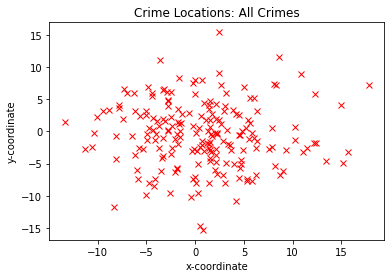

In [2]:
# TODO: READ THE DATASET, PLOT THEIR GEOGRAPHICAL LOCATIONS
df = pd.read_csv('Lab3_crime.csv')
plt.plot(df['crime_x'], df['crime_y'], 'rx')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Crime Locations: All Crimes')
plt.show()

**1.2.**

Now we want to see if the spatial pattern in violent and non-violent crime is different by plotting them as two different kinds of symbols. We could do this by writing a loop like we did for houses in Lab 2, but this is slow. Python has a simple notation that allows us to more easily isolate observations. This is usually called boolean (a boolean variable takes two values, True or False) indexing. Basically, we want to create a vector (more precisely, a `numpy.ndarray` or a `pandas.Series`) that has the same number of rows as our data frame, and takes on either `True` or `False`, and we will extract all the rows in the data frame with a corresponding `True` value in the vector.

Type `df['violent'] == 1` first and watch what happens.

The double-equal sign `==` tells Python to check for equality, rather than assigning values (`a = 1` means "assign a equal to one," while `a == 1` means "check if a is equal to 1"). `df['violent'] == 1` lets Python return a new vector that is True for each row where the statement is True (the incident is violent), and False where it is False (the incident is non-violent). We can use boolean indexing to identify the crime observations based on the attributes of crimes (whether it is violent, in which month it occurred, etc.).

Boolean indexing in pandas can be achieved through `df.loc[row_index, col_index]`. You have to specify two indices, one for row and one for column. For the rows, put the boolean vector in the square brackets and you will get the subset of rows (where the boolean vector says `True`). For the columns, put in `:` to mean that you are selecting all the columns, or put in a string (column name) to select one column.

**Now, plot the spatial distribution of violent and non-violent crimes on the same map, using different markers for the two. Be sure to label the plot properly.**

### [Quick Aside] Coding Style: Maximum Line Length
It is never too early to talk about coding style. PEP-8, the official Python style guide, says that each line of code should not exceed 79 characters. So when you write codes, it is important to wrap long lines appropriately.

Why is that? First, most code editors (this applies to Jupyter Notebook, too) do not wrap lines by default. For a language like Python, where line breaks and leading white spaces have semantic meaning, wrapping lines would make codes confusing to the readers. Second, super long lines are almost impossible to read.

In [3]:
'wouldn\'t you hate to read this line of code that is so incredibly very very very very very very very very very very very very long?'

"wouldn't you hate to read this line of code that is so incredibly very very very very very very very very very very very very long?"

The right way to wrap long lines is to use Python's implied line continuation inside parentheses, brackets and braces. If necessary, you can add an extra pair of parentheses around an expression. Here are some good practices.

```python
# implied line continuation inside parentheses
function(param1=argument1,
         param2=argument2,
         param3=argument3,
         param4=argument4,
         param5=argument5,
         param6=argument6)
# sometimes people like to do this
# enter a line break right after the parenthese/brackets/braces
# and indent by 4 spaces
d = {  # this is creating a dictionary
    'key1': 'value1',
    'key2': 'value2',
    'key3': 'value3',
    'key4': 'value4',  # leaving a comma here is fine
}
# for long strings, and with .format()
print('{} a long long string '
      'that is broken into several parts'
      .format('this is'))
```

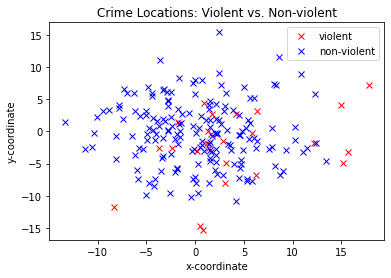

In [4]:
# TODO: PLOT YOUR MAP HERE
# USE DIFFERENT MARKERS FOR VIOLENT VS NON VIOLENT EVENTS
# WRAP LONG LINES APPROPRIATELY
# MAKE SURE THAT EACH LINE DOES NOT EXCEED 79 CHARACTERS
plt.plot(df.loc[df['violent'] == 1, 'crime_x'],
         df.loc[df['violent'] == 1, 'crime_y'], 'rx')
plt.plot(df.loc[df['violent'] == 0, 'crime_x'],
         df.loc[df['violent'] == 0, 'crime_y'], 'bx')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Crime Locations: Violent vs. Non-violent')
plt.legend(['violent', 'non-violent'])
plt.show()

## More on Indexing in pandas

`df.loc[]` allows us to index **by label**. In pandas, all the rows and columns have labels. Usually, the row labels (a.k.a. indexes) are integers 0,1,2,... (they don't have to be though, they can be strings or other data types), and column names are descriptive strings. For our `df`, each row has a integer ranging from 0 to 199 identifying that observation, and we can select the three observations with the indexes 3, 4 and 5 and assign it to `df1` by doing the following.

In [5]:
df1 = df.loc[[3, 4, 5], :]
df1

,violent,month,crime_x,crime_y
3,0,3,4.478405,-7.323084
4,0,8,-2.776546,4.977263
5,1,8,6.191399,-6.747993


You will notice that the indexes (row labels) are preserved. The first row has an index of 3 instead of 0. Now if you try to do `df1.loc[0, :]`, there will be a `KeyError` because `df1` doesn't have any observations associated with the index 0.

We can, however, also index **by position** by doing `df.iloc[]`. The following will give you the first two observations in `df1`.

In [6]:
df1.iloc[0:2, :]

,violent,month,crime_x,crime_y
3,0,3,4.478405,-7.323084
4,0,8,-2.776546,4.977263


As you've seen, `loc[]` and `iloc[]` take in a variety of types of inputs to index data frames. They take in slice objects (e.g., `0:2`), lists, boolean arrays, etc. The [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) goes into more detail on accepted input types.

*Indexing and selecting data in pandas can be rather tricky. It can take some time for beginners to get used to it. Be patient, and always visually check your data frame to make sure that you are doing what you think you are doing!*

**1.3.**

Now examine how the distribution of all crimes evolves month by month by plotting each month separately. To make comparisons across months easier, let's put them all on the same figure as 12 different panels (e.g. January will be a small map next to a separate small map for February). To do this, create a new figure and use the command `plt.subplots()`. subplot will break the figure up into smaller "subplots" while also telling Python which of these subplots you want to be drawing on with your current commands. Type `fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True)` to make an array of 12 subplots (3 down and 4 across), with the same x and y axes.

This way of creating two things at the same time is very Pythonic and is usually called multiple assignment. It helps keep your codes succint and readable. `plt.subplots()` returns two objects, and we name the first one `fig`, which is basically the large plot, and the second one `axes`, which is a collection of subplots. Each subplot can be accessed through `[]`, e.g., `axes[0, 0]` is the first subplot.

We can then specify what we want to do with each subplot. For example, we can do `axes[0, 0].plot(df['crime_x'], df['crime_y'], '+')` to plot onto the first subplot.

**Write a short for loop that goes through the months and plots the locations of all crimes in a month on a separate subplot for that month. Put January in the upper left subplot. Help your viewers understand which month they are looking at by labeling each subplot with a title that says the month number for that subplot.** (Hint: this can be done via `axes[i, j].set_title()` and `''.format()`; if the figure looks awful because the labels are cut out / overlapping with each other, `fig.tight_layout()` usually provides a quick fix.)

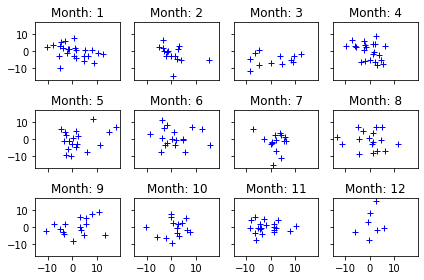

In [7]:
# TODO: PLOT YOUR MAP HERE
fig, axes = plt.subplots(nrows=3, ncols=4,
                         sharex=True, sharey=True)
month = 1
for i in range(3):
    for j in range(4):
        axes[i, j].plot(df.loc[df['month'] == month, 'crime_x'],
                        df.loc[df['month'] == month, 'crime_y'], 'b+')
        axes[i, j].set_title('Month: {:d}'.format(month))
        month += 1
fig.tight_layout()  # this improves the aesthetics
plt.show()

**1.4.**

How many crimes are there in March? How many are violent crimes? (Hint: there are multiple ways to do this, but you may find commands like `df.shape` helpful; you may need to use the logical operator `&` (and).)

In [8]:
# TODO: WRITE YOUR CODES HERE
print('Number of crimes in March: {}'
      .format(df.loc[df['month'] == 3, :].shape[0]))
print('Number of violent crimes: {}'
      .format(df.loc[(df['violent'] == 1) & (df['month'] == 3), :].shape[0]))

Number of crimes in March: 12
Number of violent crimes: 2


**1.5.**

Create a new attribute that describes the Euclidean distance from the location of each crime to the nearest violent crime (the value of this new attribute should be zero for all violent crimes). **Plot a histogram showing the distribution of these nearest-violent-crime distances using the command `plt.hist()`. Why does this distribution look the way it does?**

Some tips:

* Write a function that can be re-used so that your future self will thank you!
* You will likely have to write a double loop, where you loop over the set of source points first, and then inside that loop, you loop over the set of destination points.
* `pandas.DataFrame.values` converts the pandas data frame to a numpy array.
* `numpy.ndarray.min(axis=1)` takes the minimum of an array along the columns (`axis=0` takes min along the rows).

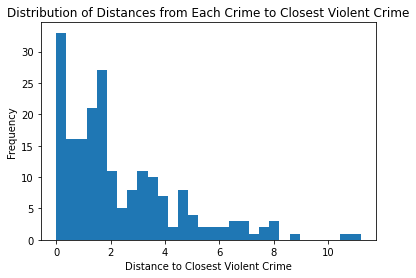

In [9]:
def compute_distances(src_x, src_y, dst_x, dst_y):
    """Computes the distances from every source point to every destination point.
    
    Args:
        src_x, src_y (numpy.ndarray): the x and y coordinates for source points.
            Denote the length of each array as dim_src.
        dst_x, dst_y (numpy.ndarray): the x and y coordinates for destination points.
            Denote the length of each array as dim_dst.
        
    Returns:
        numpy.ndarray: a dim_src by dim_dst numpy array containing the distances.
    """
    # TODO: COMPLETE THIS FUNCTION
    dist = np.zeros((src_x.shape[0], dst_x.shape[0]))
    for i in range(src_x.shape[0]):
        for j in range(dst_x.shape[0]):
            dist[i, j] = np.sqrt((src_x[i] - dst_x[j]) ** 2
                                 + (src_y[i] - dst_y[j]) ** 2)
    return dist


# TODO: USING THE FUNCTION, ANSWER THE QUESTION HERE
dist = compute_distances(
    src_x=df.loc[:, 'crime_x'].values,
    src_y=df.loc[:, 'crime_y'].values,
    dst_x=df.loc[df['violent'] == 1, 'crime_x'].values,
    dst_y=df.loc[df['violent'] == 1, 'crime_y'].values)
dist = dist.min(axis=1)
plt.hist(dist, bins=30)
plt.xlabel('Distance to Closest Violent Crime')
plt.ylabel('Frequency')
plt.title('Distribution of Distances from Each Crime to Closest Violent Crime')
plt.show()

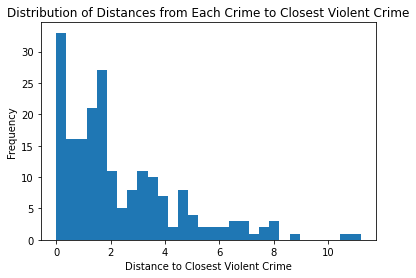

In [11]:
def compute_distances2(src_x, src_y, dst_x, dst_y):
    """Computes the distances from every source point to every destination point.
    
    Args:
        src_x, src_y (numpy.ndarray): the x and y coordinates for source points.
            Denote the length of each array as dim_src.
        dst_x, dst_y (numpy.ndarray): the x and y coordinates for destination points.
            Denote the length of each array as dim_dst.
        
    Returns:
        numpy.ndarray: a dim_src by dim_dst numpy array containing the distances.
    """
    # TODO: COMPLETE THIS FUNCTION
    dim_src = len(src_x)
    dim_dst = len(dst_y)
    dist = np.zeros((dim_src, dim_dst))
    for i in range(dim_src):
        for j in range(dim_dst):
            dist[i, j] = np.sqrt(((src_x[i] - dst_x[j]) ** 2) + ((src_y[i] - dst_y[j]) ** 2))
    return dist

dist = compute_distances2(
    src_x=df.loc[:, 'crime_x'].values,
    src_y=df.loc[:, 'crime_y'].values,
    dst_x=df.loc[df['violent'] == 1, 'crime_x'].values,
    dst_y=df.loc[df['violent'] == 1, 'crime_y'].values)

dist = dist.min(axis=1)
plt.hist(dist, bins=30)
plt.xlabel('Distance to Closest Violent Crime')
plt.ylabel('Frequency')
plt.title('Distribution of Distances from Each Crime to Closest Violent Crime')
plt.show()

[TODO: ANSWER THE QUESTION HERE]

The histogram is highly skewed toward zero, as many crimes have a very short distance to a violent crime. All violent crimes have a distance value of zero, placing lots of mass on a value of zero. Because there is a lot of clustering, few crimes are very far from a violent crime, making the right tail fairly small.

## Introducing the `.` in Python
### Namespace

I think of name space as literally a "name space": we create a space for every name (variable names, class names, function names) that is defined in our current environment. Namespace is like a dictionary, a mapping between names and objects - it helps python understand what we mean when we type certain names. If we were to put all the names together in the global namespace (like R does) and make them easily accessible, we can potentially create chaos. What if popular keywords such as `filter`, are claimed by multiple packages (this is true in R)? How would R then know which function to call, and how would we know which function we are calling (we sometimes don't!). This can be very error prone.

Python's approach to reducing overcrowding in these "name spaces" is to let each package have their own namespaces, and we can access their namespaces by using the dot notation, so `numpy.array()` means: the `array()` function in the `numpy` module. There can also be submodules (`numpy.random.random()` means the `random()` function in the `random` submodule in the `numpy` module). This leads to somewhat more verbose but much clearer and more predictable codes, which is particularly important for a multi-purpose language like Python (imagine how many packages would define their own `open()` function!).

In [10]:
# a really useful Jupyter Notebook magic command is %who
# it will list all the names that are defined in the current environment
%who
# notice that the reserved keywords in core Python are not listed here

axes	 compute_distances	 df	 df1	 dist	 fig	 i	 j	 month	 
np	 pd	 pickle	 plt	 


In [11]:
# the python command to do this is dir()
dir()
# you will notice that the outputs from here are messier
# and many internal variables are exposed
# because a lot is happening as Jupyter Notebook
# hosts this very nice environment for you to work in
# notice that the reserved keywords in core Python are not listed here
# but you can see them with `dir(__builtins__)`
# and they are still directly accessible to you

['In',
 'Out',
 '_',
 '_3',
 '_5',
 '_6',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'axes',
 'compute_distances',
 'df',
 'df1',
 'dist',
 'exit',
 'fig',
 'get_ipython',
 'i',
 'j',
 'month',
 'np',
 'pd',
 'pickle',
 'plt',
 'quit']

In [12]:
# I don't like df1 since it is a temporary variable
# let's delete it
del(df1)

### Object Oriented Programming
What is object oriented programming (OOP)? It is a paradigm where objects are at the center of the design of the language, not only representing the data, but in the overall structure of the program as well. It is often contrasted with functional programming, where functions are at the center.

Python is an object oriented language, whereas some other languages, such as R and Matlab, are more functional (in the sense that most scripts that we see in R/Matlab are more functional). Both R and Matlab are growing in the OOP direction, though, and both support the OOP paradigm.

In Python, there are many `class`es of `object`s. Each `class` has many `attribute`s and `method`s. An attribute is a "field" that stores data within the object, and a method is like a function, but defined solely on this particular class. A feature of objects is that an object's procedures can access and often modify the data fields of the object with which they are associated (objects have a notion of `self`), which essentially means, altering the persistent "state" of the object.

For example, suppose we have a data frame `df` (assuming that `df` is an `instance` of the `class` `pandas.DataFrame`), and we want to sort the rows based on its values in a certain column `order`. In Python, we would do this

```python
df.sort_values(by='order', inplace=True)
```

The dot between `df` and `sort_values()` denotes that the latter is a method of the former. So this is essentially saying that we take the object `df`, and we change the data within that object by calling the method `sort_values()`. Notice that we did not pass `df` to `sort_values()` in an argument! So how did the function know what it is supposed to perform the operation on? It implicitly remembers its "parent" (there is a strong convention in Python to call its "parent", the object, `self`).

This would normally not be done in functional programming languages, such as R. In R (tidyverse), we would do this

```R
df = dplyr::arrange(df, order)
```

Notice that we have to tell the function `arrange()` that we want it to perform sorting on `df`, the first argument that we passed into the function. This is sometimes called a "pure" function: it does not alter the input, create any "side effects" (do anything other than generating the output), and all it does is returning the output.

This may seem like a subtle difference at first, but it profoundly impacts the way that codes are structured in these programming languages. As we spend more and more time working in Python, and as we approach problems that are more and more complicated, this will become more obvious.

All the Python modules are written in an object oriented manner. For example, `pandas` has a couple of important classes: `pandas.Series` and `pandas.DataFrame`, each of these have many, many methods that you can take advantage of to organize and modify your data frames. Note that all modifications are by default not in place (a new object is returned and the original object is not modified) unless the user specified `inplace=True`.

### Reading Documentation

Now let's try to read the pandas [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

Browse the webpage and click on [general functions](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html). These are the "pure" functions that pandas defined. You would call them like this: `pd.concat()`.

Click on `concat()` and you will see this:

```python
pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
```

Lots of arguments! This is typical as pandas is a versatile package. The parameters without default values (`objs`) are the ones that you must pass arguments for (otherwise an error will be raised). If you want to override a default value, you can do that by passing that argument into the function, e.g., `pd.concat(df1, df2, axis=1)`. The documentation should explain what parameter does what.

Now, browse the home webpage and click on [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html), which is perhaps the most important class in pandas. Click on [Constructor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) - this explains how you could create a new `pandas.DataFrame` instance. Scroll down and you'll see that all the attributes and methods are listed. Attributes can be accessed through the dot notation (e.g., `df.columns` gives a list of column names). Methods can be called also using the dot notation (e.g, `df.describe()` describes the dataset). Click on any attribute or method to see the documentation of those, along with some examples.

From now on, we will not be providing as many hints and explanations as before, as we will be assuming that you know how to find and read documentation.

## 2. Identifying Cholera Infection Hotspots
The dataset `Lab3_cholera.p` contains the location of cholera cases during an outbreak (the sample was collected over one month). Your job is to identify cholera hotspots so that public health workers can figure out where the pathogens are coming from. To do this, you will have to estimate the intensity of cholera cases over the entire region (for values of x ranging from 1-10 and values of y ranging from -10 to +10).

We will not use only the quadrat or kernel estimation techniques that we learned in class. Instead, we'll use a simple hybrid of the two. Imagine drawing a grid with lines at each integer value in x and at each integer value in y (this looks like a normal grid). We will go to each location $\overrightarrow{\underset{\cdot}{c}}$ where these lines intersect and we will construct an estimate for the rate at which cholera cases arise (the infection rate) at that location $\lambda(\overrightarrow{\underset{\cdot}{c}})$ by using a kernel estimate.

The kernel we'll use is sometimes called the "uniform kernel" because it assigns all observations uniform weight so long as they are within a certain cutoff distance $h$ (the cutoff distance is the bandwidth for this particular kernel). Imagine that we are standing at a point $\overrightarrow{\underset{\cdot}{c}}$, a lattice point on our grid. We draw a circle of radius $h$ around our location. If any events occur within that circle, we count those events and assign them to our location $\overrightarrow{\underset{\cdot}{c}}$ as an infection. However, because the infection rate $\lambda(\overrightarrow{\underset{\cdot}{c}})$ describes $\frac{infections}{area}$, we must adjust this count for the area we are examining. In the case of this uniform kernel, the area we examine covers $\pi \times h^2$ with uniform weight, so we divide our infection count by this area to compute the rate of infection per unit area. We'll look for infection hotspots by plotting these infection rate estimates in a bubble plot, with larger bubbles depicting higher infection rates.

**2.1.**

Begin by making sure that you understand the procedure. We will look at the set of points $\overrightarrow{\underset{\cdot}{s}}=[x,y]$ where we use each pairwise combinations from the two sets
$$x \in \{1,2,3,...,10\}$$
$$y \in \{-10,-9,-8,...,10\}$$
(Hint: you may want to draw this grid on scrap paper.) For each $\overrightarrow{\underset{\cdot}{s}}$, we compute the Euclidean distance to the location of each cholera infection in the dataset. We then generate a new vector that is the weighted count of infections for $\overrightarrow{\underset{\cdot}{s}}$, where the weights are determined by each infection site's distance from $\overrightarrow{\underset{\cdot}{s}}$. The weights are determined by the kernel function, which in this case is the uniform kernel:

$$
\kappa_{unif}\left(\frac{dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site}}})}{h}\right)=\mathbf{1}\left[ \left(\frac{dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site}}})}{h}\right) < 1 \right] \times \frac{1}{\pi}
$$

Where $dist(\cdot)$ is the distance function, $\overrightarrow{\underset{\cdot}{s}}_{inf\_site}$ is the site of an infection event and $\mathbf{1}[\cdot]$ is the indicator function that is one if the statement in brackets is true. All this equation says is that an infection event is given a weight of one if its distance to the lattice point is less than $h$ (or equivalently that the distance divided by $h$ is less than one). The factor $\frac{1}{\pi}$ is just there to account for the circular structure of the area we are examining, as described above. (Hint: you may want to draw the shape of this kernel function on a sheet of scrap paper, where the horizontal axis is the distance from $\overrightarrow{\underset{\cdot}{s}}$ and the vertical axis is $\kappa$). Just like normal kernel estimation that we covered in class, we then estimate the infection rate at $\overrightarrow{\underset{\cdot}{s}}$ by summing up these weighted values for all of the infection sites, which we index by $j$:
$$
\hat{\lambda}(\overrightarrow{\underset{\cdot}{s}}) = \sum_{j=1}^{N}\left[ \frac{1}{h^{2}}\times \kappa_{unif}\left(\frac{dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site\;j}}})}{h}\right)\right]
$$
which after subsitution and a little simplification looks less intimidating:
$$
\hat{\lambda}(\overrightarrow{\underset{\cdot}{s}}) =\frac{1}{\pi h^{2}} \times \sum_{j=1}^{N} \mathbf{1}\left[ dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site\; j}}})< h \right]
$$
The estimate for the infection rate at a location is just sum of several 1's and 0's, scaled by the area of a circle. The main challenge is to figure out which infection events to count as a 1 and which to count as a 0, which we do by measuring the distance to each event.

Write a script that estimates $\hat{\lambda}(\overrightarrow{\underset{\cdot}{s}})$ at each lattice point using the approach above. Some tips:

* You should write your script so that the bandwidth variable `h` is defined once and only once, and you then just refer to this variable at subsequent points in the script (so you can easily change the bandwidth). In your first run, use `h=2`. This means we assign an infection to a lattice point if it's less than 2 units away.
* In Python you can get the constant $\pi$ by just typing `np.pi`. In your code, you can use `np.pi` as if it were a variable.
* Use the function that you wrote for problem 1, and thank your past self for writing a generalizable function!
* In order to use the function that you wrote, you need to change how you represent your lattice point coordinates. Think about what form of input the function takes in, and how to construct that input. You may need to use `numpy.meshgrid()` and `numpy.ndarray.flatten()`.
* By default, logical and arithmetic operators in Python are executed on each element of a matrix/array, rather than on the entire matrix as a whole (matrix multiplication and exponentiation are also operations that Python performs, but you need to call other functions to do that). If you use these element-wise operations, Python returns a matrix that this the same size as the original. For example, if you type `a > 0`, python will check each element of `a` and give this element a value of `True` if it is positive and `False` otherwise. If `a` and `b` are vectors (`numpy.ndarray`) of the same size, then `a * b` means Python should multiply the first element in `a` by the first element in `b` and return this value into the first element of the new vector. It will then multiply the second element in `a` by the second element in `b`, and so on. If you type `a ** 2`, then each element in `a` is squared, rather than the entire matrix being matrix-multiplied against itself.

In [13]:
# TODO: LOAD DATA, CONSTRUCT THE GRID, COMPUTE DISTANCES HERE
# load the dataset
with open('Lab3_cholera.p', 'rb') as f:
    d = pickle.load(f)
cholera_x = d['cholera_x']
cholera_y = d['cholera_y']
# construct lattice points
x, y = np.meshgrid(range(1, 11), range(-10, 11))
x, y = x.flatten(), y.flatten()
# call function to compute distance matrices
dist = compute_distances(
    src_x=x, src_y=y,
    dst_x=cholera_x, dst_y=cholera_y)

In [14]:
# define bandwidth
h = 2
# TODO: CALCULATE YOUR lambdas HERE
lambdas = (dist < h).sum(axis=1) / (np.pi * (h ** 2))

**2.2.**

**2.2.1.**

Once you have computed the infection rate at a lattice point, plot it in the bubble plot map. If a lattice point has a non-zero infection rate, plot a red dot. We want to make the dot larger where there are more infections, so we tell Python to set the marker size property to be proportional to `lambas`. Adjust the aesthetics of the graph to make it readable. Hint: use `plt.scatter()` and take advantage of the `s` (size) parameter.

**2.2.2.**
Overlay the locations of the actual infection events using a different marker (that doesn't change size). Do you think this approach identifies the spatial distribution of infection risk well?

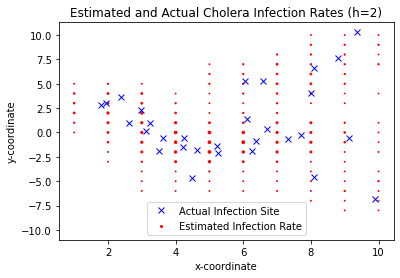

In [15]:
# TODO: PLOT YOUR MAP HERE
plt.plot(cholera_x, cholera_y, 'bx')
plt.scatter(x, y, s=10*lambdas, c='r')
plt.legend(['Actual Infection Site', 'Estimated Infection Rate'])
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Estimated and Actual Cholera Infection Rates (h={})'.format(h))
plt.show()

[TODO: ANSWER THE QUESTION HERE]

Yes, the estimated infection rate captures the distribution of infection risk quite well.

**2.3.**

**Rerun your code, but change the bandwidth to `h=1`. Rerun it again but use `h=3`. Turn in both of these maps. How do your three estimates for infection rates compare? Why? What is the advantage or disadvantage of using a larger bandwidth? Do the different bandwidths identify the same infection hotspots?**

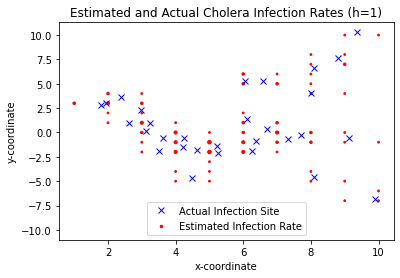

In [16]:
# TODO: PLOT YOUR MAP FOR h=1 HERE
h = 1
lambdas = (dist < h).sum(axis=1) / (np.pi * (h ** 2))
plt.plot(cholera_x, cholera_y, 'bx')
plt.scatter(x, y, s=10*lambdas, c='r')
plt.legend(['Actual Infection Site', 'Estimated Infection Rate'])
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Estimated and Actual Cholera Infection Rates (h={})'.format(h))
plt.show()

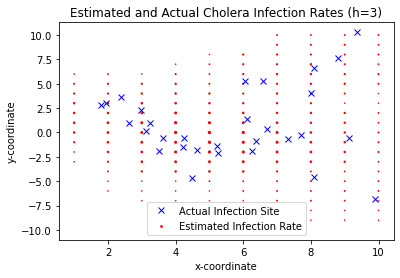

In [17]:
# TODO: PLOT YOUR MAP FOR h=3 HERE
h = 3
lambdas = (dist < h).sum(axis=1) / (np.pi * (h ** 2))
plt.plot(cholera_x, cholera_y, 'bx')
plt.scatter(x, y, s=10*lambdas, c='r')
plt.legend(['Actual Infection Site', 'Estimated Infection Rate'])
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Estimated and Actual Cholera Infection Rates (h={})'.format(h))
plt.show()

[TODO: ANSWER THE QUESTION HERE]

We can see how the coarseness of the bandwidth affects our estimated infection rates at each point. For `h = 1`, we include only infection sites very close to any given grid point when estimating the kernel function, implying that there is little smoothing happening. However, the larger bandwidth means we include infection sites quite far away when estimating the kernel function, so that there is a lot of smoothing. The lack of size differentiation in this plot demonstrates this smoothing. Hotspots look similar across bandwidths, but are much harder to identify when `h = 3`. Some of the less dominant hotspots, such as those in the upper right corner, are not identfiable at all.

The benefit of a lower bandwidth is that differentiation is easier to identify - we can see hotspots clearly - and that only information from nearby locations are used to estimate the infection rate. The cost of low bandwidth, however, is that less information is used for each estimate, making the differentiation we see partly due to noise. A bandwidth of `h = 2` seems to be a nice compromise between the overly-smooth estimation using `h = 3`, where hotspots are hard to see and there is little differentiation, and the minimally-smoothed estimation using `h = 1`, which may be excessively noisy.

## 3. Let's Go Fishing: Simulating Poisson Clustering
Here you will generate synthetic data that will simulate a Poisson point process (PPP). You'll then compute the K-function for several of your simulations to evaluate the clustering of data in a Poisson point process.

**3.1.**

Consider the space $0<x<10$ and $0<y<10$. This space has an area of 100. Suppose we have a homogenous PPP that generates 120 events on average over this area. What is $\lambda$? What does this number mean?

[TODO: Answer the question here]

$\lambda = 120/100 = 1.2$ meaning the rate/intensity of "success" defined over a spatial area.

**3.2. Let's simulate this PPP.**

**3.2.1.**

Since the total number of events $z$ must follow a Poisson distribution, draw a random number from this distribution. Since the expected number of events is 120, draw the random variable $z$ using the function `np.random.poisson(lam=120)`.

**3.2.2.**

The location of these z events are completely random over the area we are considering, so we can draw their x and y locations from a uniform distribution that goes from zero to ten. Since x and y are uncorrelated, draw these random variables (actually vectors) separately with the function `np.random.random`. We now have the locations of observations for a single simulated realization of our PPP. Plot the observations from this realization.

**3.2.3.**

Repeat this process 3 times. Each time you will draw a new value for z, x and y. How do they compare to one another? Are you surprised?

Hint: to repeat this process 3 times, you will want to write a for loop with `range(3)`, some would write `for i in range(3):` but we don't actually need to store `i` because we don't need to keep track of the number of simulations already run. Python has a very nice feature called throwaway variable `_`, and you could write `for _ in range(3):` so that the `_` variable is thrown away. This is not only memory efficient but also syntactically clear. The readers of these codes will know "oh, you are not planning to do anything with this variable".

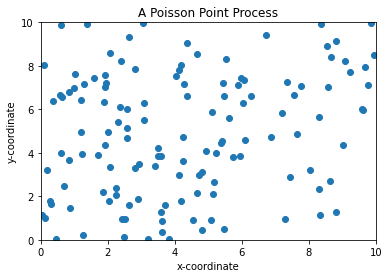

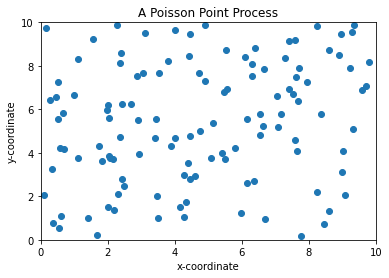

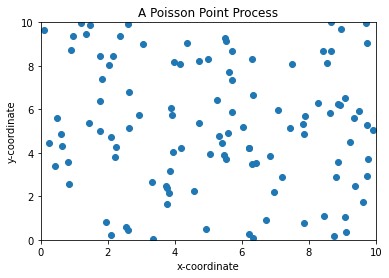

In [18]:
# TODO: WRITE YOUR CODES HERE
for _ in range(3):
    # draw the total number of events from a Poisson distribution
    # with a mean of 120
    z = np.random.poisson(lam=120)
    # draw the x and y locations of these z events from a UNIFORM distribution
    x = np.random.random(z) * 10
    y = np.random.random(z) * 10
    plt.plot(x, y, 'o')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.title('A Poisson Point Process')
    plt.show()

[TODO: ANSWER THE QUESTION HERE]

As we can see, each plot looks quite different, as both the number of events plotted and both of their coordinates are drawn randomly each time.

**3.3.**

Write a script to compute the K-function for one of these realizations (or a new one). The procedure you will use is closely related to the calculations you did in the cholera example above, although there are some important differences.

* One difference is that you will be computing the distance from each observation to all other observations, rather than the distance from a lattice point to all other observations. The formula is as below
$$\hat{K}(h) = \frac{1}{z\lambda}(\sum_{i=1}^z \sum_{j \neq i} \mathbf{1}\{D(\overrightarrow{\underset{\cdot}{s_i}}, \overrightarrow{\underset{\cdot}{s_j}}) < h\})$$
* Another difference is that you will average your results over all points (why there is a double summation instead of just one) and output a graph of $K(h)$. Your final results is not a map but a function $K$ defined over distances $h$.
* For more on computing the K-function, see Lloyd 7.4.2.

Compute $K(h)$ for the integer values of $h=\{1,2,3...,7\}$. You don't need to try and compute every value in between. You can plot the K-function as a line using `plt.plot(h, K, '-')` (this interpolates for you). Overlay on this figure a plot of ${\pi \times h^2}$ using a different color (recall that this is the expected K-function for a PPP). How do they compare and why?

Notes: What we've done in the above blocks is copy-pasting lots of codes. Copy-pasting code is in general a bad practice and is strongly discouraged: (1) What if you want to change something about your codes (e.g., you realized later on that there is a bug somewhere)? You would need to fix it multiple times. (2) What if someone else (most likely your future self) wants to read your codes and understand what you were doing? They would then have to read the same block of codes over and over again (and wonder about whether there are small changes made to each copy).

What is encouraged, then, is to write functions. Functions keep your codes organized, easy to maintain, and recycleable. In earlier labs we will be nudging you to write functions by writing the docstrings for you, and in later labs we expect that you will be writing functions on your own.

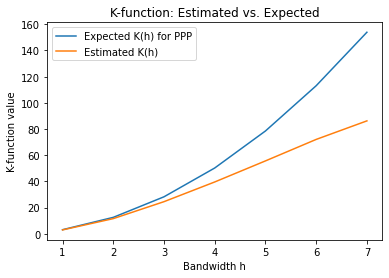

In [19]:
def K(h, new=True, z=None, x=None, y=None):
    """Calculates the K function for different bandwidths.
    
    Args:
        h (numpy.ndarray): an array of bandwidths.
        new (bool): whether a new simulation should be carried out.
            if False, x, y, z arguments need to be supplied.
        x, y (numpy.ndarray): arrays containing x, y coordinates of the events.
        z (int): number of events in a realization of the simulation
    
    Returns:
        numpy.ndarray: a array of K(h), of the same length as h.
    """
    # TODO: COMPLETE THIS FUNCTION
    # these bool inputs (flags) control the behavior of the function
    # allowing you to write functions that, for example,
    # take different kinds of input
    if new:
        z = np.random.poisson(lam=120)
        x = np.random.random(z) * 10
        y = np.random.random(z) * 10
    # compute the distance matrix between every observation
    dist = compute_distances(
        src_x=x, src_y=y,
        dst_x=x, dst_y=y)
    # this loops over all the h's
    # and for every h calculates the overall sum of the indicator function
    # minus z (the distance from an observation to itself)
    # appropriately scaled
    K = np.array([((dist < h_i).sum() - z) / (z * 1.2) for h_i in h])
    return K


# TODO: USING THE FUNCTION, ANSWER THE QUESTION HERE
h = np.array(range(1, 8))
plt.plot(h, np.pi * (h ** 2), '-')
plt.plot(h, K(h), '-')
plt.legend(['Expected K(h) for PPP', 'Estimated K(h)'])
plt.xlabel('Bandwidth h')
plt.ylabel('K-function value')
plt.title('K-function: Estimated vs. Expected')
plt.show()

[TODO: ANSWER THE QUESTION HERE]

It's clear that the simulated K-function is lower than the expected one for a PPP. That is, I estimate that the number of events within distance h of any given point is less than the expected, and the gap between my estimate and the expected function increases as h grows. This is due to edge effects - for each point, my code draws a circle around that point with radius h, and calculates how many events occur within that radius. The K(h) function is the average of the number of events in that circle of radius h, averaged over all events in the sample. Since many of our events will be close to the edges of the grid, those circles will have fewer events in them, pulling down the average. Thus, the K-function lies below the expected function. We could solve the problem by only counting averages over events i that are farther than h away from the edges of the grid, but this is difficult as h rises. For example, at h > 5, no events will satisfy this criteria and thus we won't be able to take an average. The gap between my estimated function and the expected function grows as h rises, since the edge effects gets worse at higher bandwidths.

**3.4.**

**3.4.1.**

Now expand your script to simulate the PPP fifty times and calculate the K-function each time. Don't bother storing the $x$ and $y$ values to each simulation, just store the values of $K(h)$. Plot all 50 estimates for $K(h)$ on a single plot using a single color. Again, overlay on this figure a plot of $\pi \times h^2$ using a different color. **How do they compare and why?**

**3.4.2.**

The dataset `Lab3_poisson_test_data.p` contains location data from a different point process. We want to test if it is more or less clustered than a PPP. Compute the K-function for this dataset at the same values for $h$. Plot this K-function overlaid with your earlier plot of 50 K-functions from the simulated PPP (using a third color). **Does the testing data look more, less or similarly clustered to the PPP data?** Plot a map of the testing data to check whether your interpretation makes intuitive sense or not.

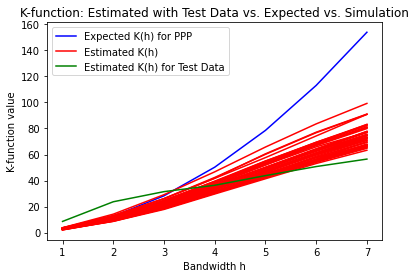

In [20]:
# TODO: WRITE YOUR CODES HERE
h = np.array(range(1, 8))
# simulate and store the results in K_sims
K_sims = [K(h) for _ in range(50)]
# load data
with open('Lab3_poisson_test_data.p', 'rb') as f:
    d = pickle.load(f)
x_test = d['x_test']
y_test = d['y_test']
# calculate K functions for test data
K_test = K(h, new=False, x=x_test, y=y_test, z=x_test.shape[0])
# plot the theoretical results
plt.plot(h, np.pi * (h ** 2), 'b-', label='Expected K(h) for PPP')
# plot the simulation results
for K_sim in K_sims:
    plt.plot(h, K_sim, 'r-')
plt.plot([], [], 'r-', label='Estimated K(h)')
# plot the test results
plt.plot(h, K_test, 'g-', label='Estimated K(h) for Test Data')
plt.legend()
plt.xlabel('Bandwidth h')
plt.ylabel('K-function value')
plt.title('K-function: Estimated with Test Data vs. Expected vs. Simulation')
plt.show()

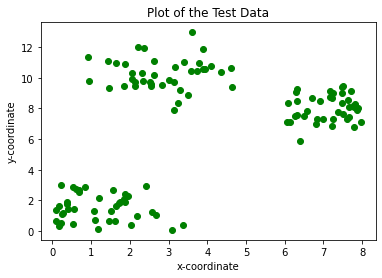

In [21]:
# TODO: PLOT TEST DATA HERE
plt.plot(x_test, y_test, 'go')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.title('Plot of the Test Data')
plt.show()

[TODO: ANSWER THE QUESTIONS HERE]

The estimated K-function lines fall below the expected K(h), due to edge effects, which become more problematic at higher bandwidths. These 50 lines show us the dispersion in estimates due to sampling, but show that all fall significantly below the expected line.

Finally, we use the provided test dataset and estimate a K-function for these data, plotting the estimated line against the expected for a PPP as well as the 50 simulated runs from the previous problem. We can see that the test data show some clustering at low bandwidths, but then the K-function falls toward the simulated data lines at higher band- widths, probably due to the edge effect. The test data are actually likely more clustered than a true PPP, but the edge effects are dominating the clustering and so we can't see the clustering at higher bandwidths. Looking at a simple plot of the test data below suggests this is true - the data look quite clustered.

## Congratulations!
You've finished this lab!

* **Please list everyone you worked on this assignment with outside of Ed Discussion posts.**÷